In [1]:
!apt-get install -y xvfb python-opengl > /dev/null 2>&1
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!pip install mpi4py
!pip install stable-baselines[mpi]

     |████████████████████████████████| 1.4MB 3.4MB/s 
  Created wheel for mpi4py: filename=mpi4py-3.0.3-cp36-cp36m-linux_x86_64.whl size=2074449 sha256=c694a6fa7f0006b873fbe59cb74b4498e007c95ec176d7378ba84886a5c3bc6f
  Stored in directory: /root/.cache/pip/wheels/18/e0/86/2b713dd512199096012ceca61429e12b960888de59818871d6
Successfully built mpi4py
     |████████████████████████████████| 256kB 3.4MB/s 


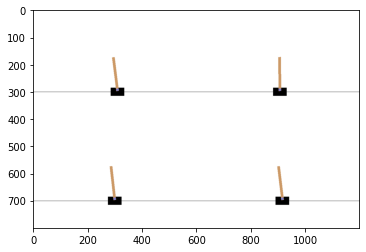

In [ ]:
import gym

from stable_baselines.common.policies import MlpPolicy, MlpLstmPolicy, MlpLnLstmPolicy
from stable_baselines.common import make_vec_env
from stable_baselines import ACER
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay
from pyvirtualdisplay import Display
display = Display(visible=0, size=(400, 300))
display.start()

# multiprocess environment
env = make_vec_env('CartPole-v1', n_envs=4)

model = ACER(MlpPolicy, env, verbose=1)
model.learn(total_timesteps=25000)
model.save("acer_cartpole")

del model # remove to demonstrate saving and loading

model = ACER.load("acer_cartpole")

obs = env.reset()
while True:
    action, _states = model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    screen = env.render(mode='rgb_array')
    plt.imshow(screen)
    ipythondisplay.clear_output(wait=True)
    ipythondisplay.display(plt.gcf())


In [4]:
!pip install tensorflow==1.14

     |████████████████████████████████| 109.2MB 89kB/s 
     |████████████████████████████████| 3.2MB 40.0MB/s 
     |████████████████████████████████| 491kB 32.9MB/s 
  Found existing installation: tensorboard 2.2.2
    Uninstalling tensorboard-2.2.2:
      Successfully uninstalled tensorboard-2.2.2
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: tensorflow 2.2.0
    Uninstalling tensorflow-2.2.0:
      Successfully uninstalled tensorflow-2.2.0
